## Gradient Descent on Logistic Regression (on SIGMOID Function)

In [1]:
from sklearn.datasets import make_classification
import numpy as np

x,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=20)

In [2]:
import matplotlib.pyplot as plt

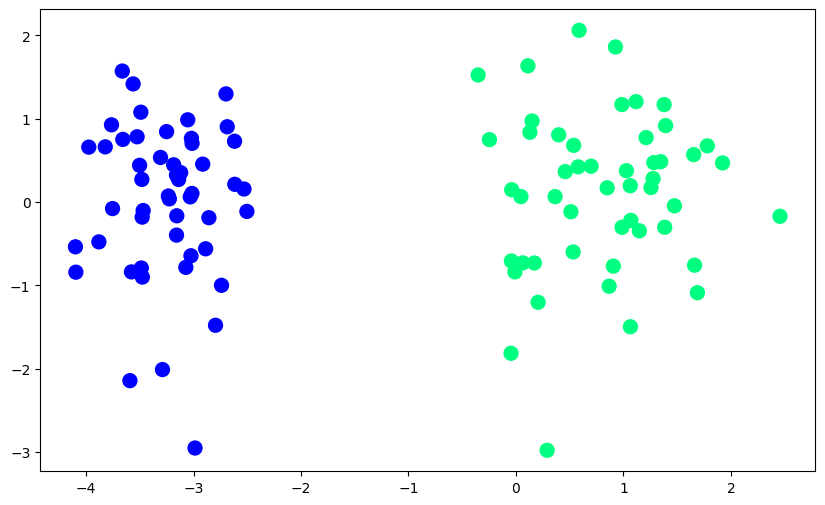

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [5]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None,solver='sag')
lor.fit(x,y)

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [6]:
print(lor.coef_)
print(lor.intercept_)

[[4.77289971 0.20667646]]
[5.73758856]


In [7]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [8]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [23]:
def gd(x,y):
    x = np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.5

    # this is batch Gradient Descent
    for i in range(2500):
        y_hat = sigmoid(np.dot(x,weights))
        weights = weights + lr*(np.dot((y-y_hat),x)/x.shape[0])

    return weights[1:],weights[0]

In [24]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [25]:
coef_, intercept_= gd(x,y)

In [26]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [27]:
x_input1 = np.linspace(-3,3,100)
y_input1= m*x_input + b

(-3.0, 2.0)

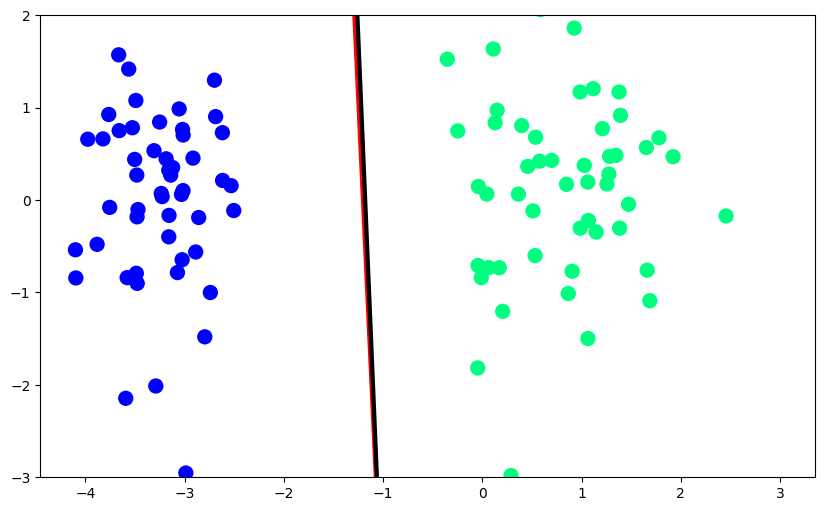

In [29]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.plot(x_input1, y_input1, color='black', linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)